The database must be download from [here](https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv)

## 1. Data wrangling

In [1]:
#import libraries
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv('cases-brazil-cities-time.csv', index_col='date', parse_dates=['date'])
df2 = df2[~df2.city.str.contains("TOTAL")]
df2 = df2[~df2.city.str.contains("CASO SEM LOCALIZAÇÃO DEFINIDA")]
df2 = df2[df2['state'].str.contains("SP")]
#df2 = df2.rename(columns = {"city": "Localidades"}) 
df2['city'] = df2['city'].str.replace(r'/SP', '')
#df2 = df2[:'2020-08-15'] 
df2.tail()

,epi_week,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,last_info_date
date,,,,,,,,,,,,,,,,
2020-10-03,40,Brazil,SP,Águas de São Pedro,3500600,35103.0,Piracicaba,0,1,0,54,28.97711,1564.76384,0.01852,SES,2020-10-02
2020-10-03,40,Brazil,SP,Álvares Florence,3501202,35157.0,Votuporanga,0,3,0,60,81.54390,1630.87796,0.05000,SES,2020-10-02
2020-10-03,40,Brazil,SP,Álvares Machado,3501301,35112.0,Alta Sorocabana,0,8,0,233,32.10917,935.17961,0.03433,SES,2020-10-02
2020-10-03,40,Brazil,SP,Álvaro de Carvalho,3501400,35093.0,Marília,0,4,0,17,76.52573,325.23436,0.23529,SES,2020-10-02
2020-10-03,40,Brazil,SP,Óleo,3533809,35094.0,Ourinhos,0,0,0,5,0.00000,200.32051,0.00000,SES,2020-10-02


In [3]:
df22 = df2.reset_index(drop=True)
a = df22['city'].drop_duplicates()
cidades = np.array(a)
cidades

array(['São Paulo', 'Santana de Parnaíba', 'Ferraz de Vasconcelos',
       'Carapicuíba', 'Mauá', 'Santo André', 'São Bernardo do Campo',
       'São Caetano do Sul', 'Guarulhos', 'Barueri', 'Campinas', 'Cotia',
       'Jaguariúna', 'Osasco', 'São José do Rio Preto',
       'São José dos Campos', 'Suzano', 'Taubaté',
       'Vargem Grande Paulista', 'Hortolândia', 'Mogi das Cruzes',
       'Caieiras', 'Embu das Artes', 'Iracemápolis', 'Jundiaí', 'Poá',
       'Ribeirão Pires', 'Rio Claro', 'São Sebastião', 'Taboão da Serra',
       'Valinhos', 'Arujá', 'Louveira', 'Mairiporã', 'Ribeirão Preto',
       'Tatuí', 'Diadema', 'Sorocaba', 'Brodowski', 'Cajamar', 'Itapevi',
       'Itupeva', 'Jandira', 'Paulínia', 'Penápolis', 'Piracicaba',
       'Porto Feliz', 'Santos', 'São Pedro', 'Americana', 'Araçatuba',
       'Bauru', 'Cachoeira Paulista', 'Franco da Rocha', 'Guarujá',
       'Itapecerica da Serra', 'Itaquaquecetuba', 'Lençóis Paulista',
       'Matão', 'Mogi Guaçu', 'Nova Odessa', 'P

> Here we must define which county you want to check

In [70]:
df = df2
df = df[df['city'].str.contains('Bauru')]
df.columns

Index(['epi_week', 'country', 'state', 'city', 'ibgeID', 'cod_RegiaoDeSaude',
       'name_RegiaoDeSaude', 'newDeaths', 'deaths', 'newCases', 'totalCases',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', '_source', 'last_info_date'],
      dtype='object')

In [71]:
df = df.drop(['epi_week', 'country', 'state', 'city', 'ibgeID', 'cod_RegiaoDeSaude',
       'name_RegiaoDeSaude', 'newDeaths', 'deaths', 'newCases',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', '_source', 'last_info_date'],axis=1)

In [72]:
df.tail()

,totalCases
date,
2020-09-29,10460
2020-09-30,10552
2020-10-01,10765
2020-10-02,10891
2020-10-03,10891


## 2. Benford distribution

In [73]:
import benford as bf


Initialized sequence with 186 registries.
First_1_Dig
1    0.252688
2    0.188172
3    0.107527
4    0.086022
5    0.091398
6    0.086022
7    0.075269
8    0.064516
9    0.048387
Name: Found, dtype: float64

Test performed on 186 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


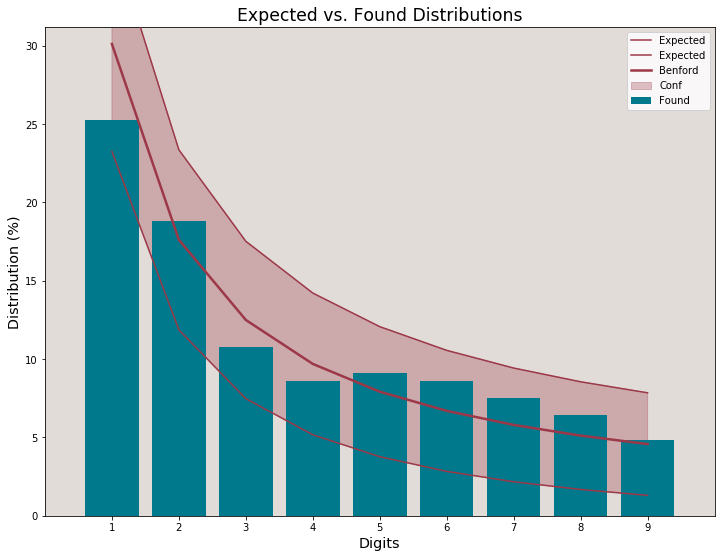

In [74]:
f1d = bf.first_digits(df.totalCases, digs=1, decimals=8,confidence=95) # digs=1 for the first digit (1-9)

In [75]:
f1d.head()

,Counts,Found,Expected,Z_score
First_1_Dig,,,,
1,47,0.252688,0.301030,1.357369
6,16,0.086022,0.066947,0.894182
7,14,0.075269,0.057992,0.851259
8,12,0.064516,0.051153,0.660861
3,20,0.107527,0.124939,0.607303



Initialized sequence with 186 registries.
First_1_Dig
1    0.252688
2    0.188172
3    0.107527
4    0.086022
5    0.091398
6    0.086022
7    0.075269
8    0.064516
9    0.048387
Name: Found, dtype: float64

Test performed on 186 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []
Mean Absolute Deviation: 0.017032
MAD > 0.015000: Nonconformity.


The Chi-square statistic is 5.2733.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.0646.
Critical K-S for this series: 0.0997


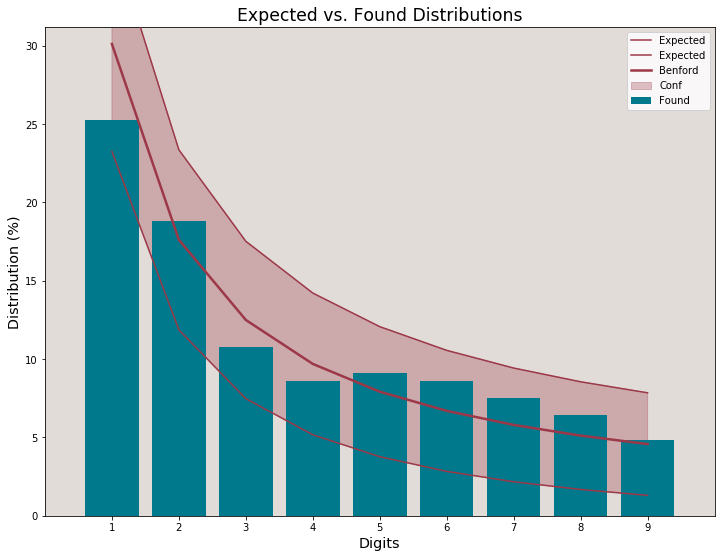

In [76]:
f2d = bf.first_digits(df.totalCases, digs=1, decimals=8, confidence=95,
                      MAD=True, chi_square=True, KS=True,show_plot=True)


 #################  Mantissas Test  #################

The Mantissas MEAN is      0.526517.	Ref: 0.5
The Mantissas VARIANCE is  0.090871.	Ref: 0.08333
The Mantissas SKEWNESS is  -0.201742.	Ref: 0.0
The Mantissas KURTOSIS is  -1.196827.	Ref: -1.2



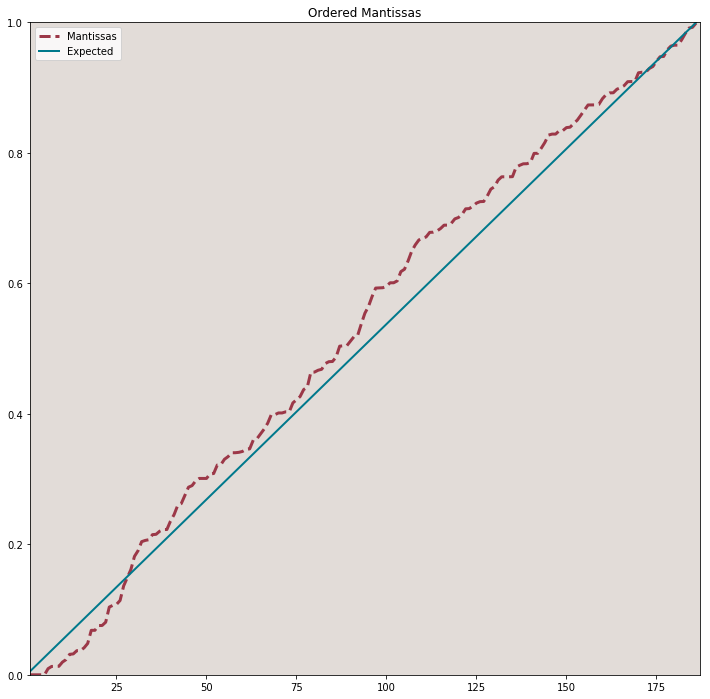

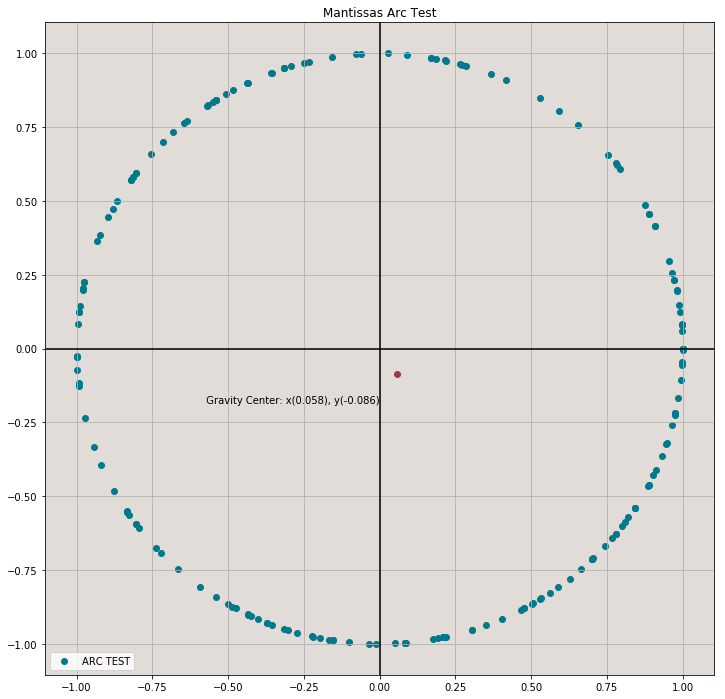

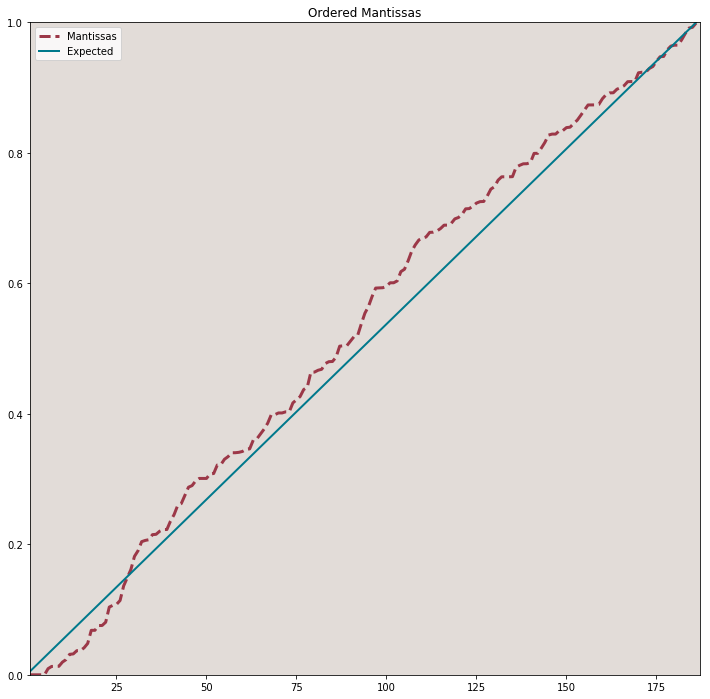

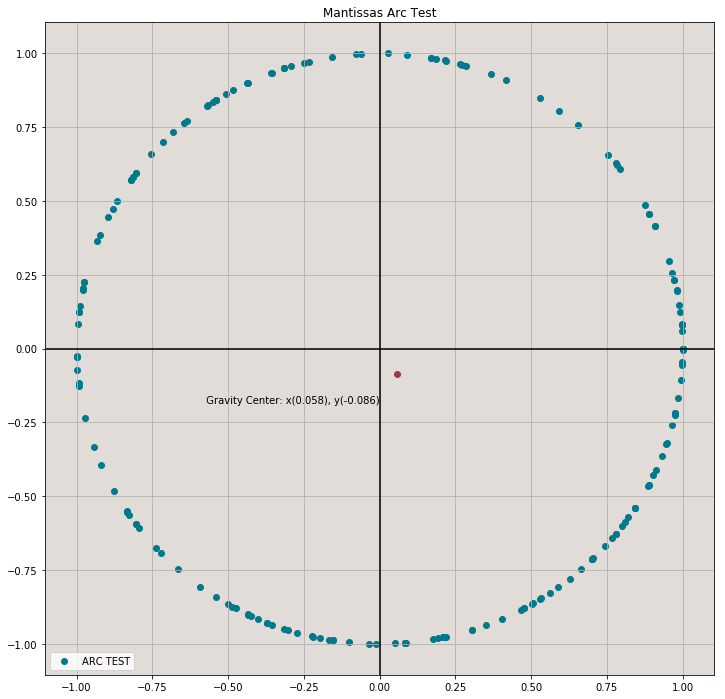

In [77]:
mant = bf.mantissas(df.totalCases)

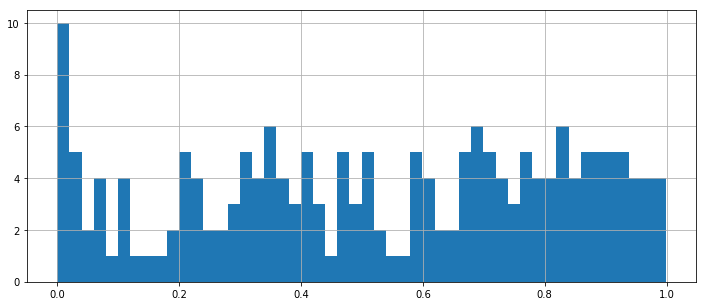

In [78]:
mant.data.Mantissa.hist(bins=50, figsize=(12,5));

In [79]:
benf = bf.Benford((df, 'totalCases'), decimals=8)


 ########## Benford Object Instantiated ########### 

Initial sample size: 187.

Test performed on 186 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}



 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.017032
MAD > 0.015000: Nonconformity.

For confidence level 95%: 

	Kolmogorov-Smirnov: 0.064561 
	Critical value: 0.099720 -- PASS

	Chi square: 5.273295 
	Critical value: 15.507000 -- PASS

	Critical Z-score:1.96.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


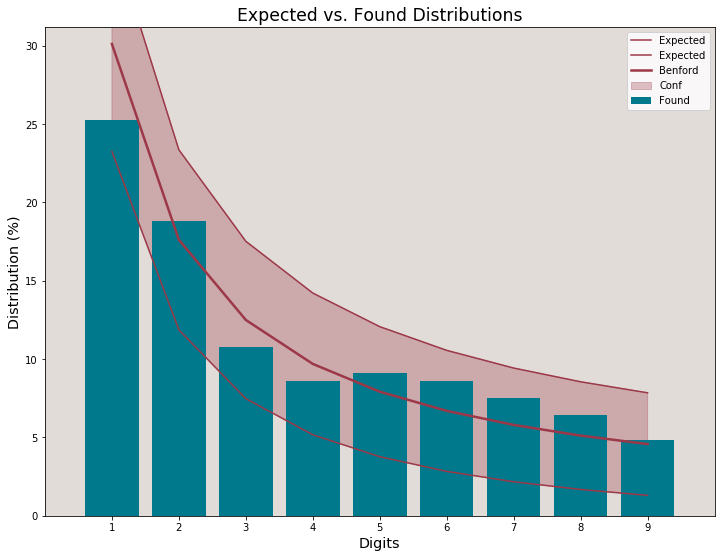

In [80]:
benf.F1D.report()